<a href="https://colab.research.google.com/github/JhairtVegaQ/ProyectoML/blob/main/ProyectoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFECV, VarianceThreshold
import xgboost as xgb
import shap

# 1. Preprocesamiento de la Data

TRABAJO ML:
- Terminar los 4 modelos para domingo en la noche (ya se tiene el mismo preprocesamiento).(REGRESION LINEAL Y REDES NEURONALES)
- El lunes alguien lo pone todo en GitHub
- El lunes yo termino el informe (probablemente en la noche)
- El martes, Jhair y Sofia hacen el ppt

EXPO:
1. Contexto del proyecto (hablar sobre la temp critica y los elementos). Además, mencionar el trabajo relacionado asignado - ricardo
2. Preprocesamiento de la data - gaby
3. Random forest - gaby
4. XGBoost - jhairt
5. regresion lineal - ricardo
6. redes neuronales - sofia
7. Discusión comparando el accuracy obtenido con trabajos previos - jhairt
8. Conclusiones y trabajos futuros - sofia

In [ ]:
# Cargar los datos y los visualizamos

from ucimlrepo import fetch_ucirepo
data = fetch_ucirepo(id=464)
df = pd.concat([data.data.features, data.data.targets], axis=1)
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [ ]:
# Podemos ver más a profundidad toda la data

df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [ ]:
# Análisis preliminar

print("Shape original:", df.shape)
print("Valores faltantes:", df.isna().sum().sum(), "en total.")

Shape original: (21263, 82)
Valores faltantes: 0 en total.


In [ ]:
# Notamos que no hay columnas categóricas, solo numéricas

((df.dtypes == 'category') | (df.dtypes == 'object')).sum()

np.int64(0)

In [ ]:
# Limpieza general
df.drop(columns=['Id'], errors='ignore', inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

Top 20 pares de columnas más correlacionadas:
entropy_fie                entropy_atomic_radius        0.997735
entropy_atomic_radius      entropy_fie                  0.997735
wtd_gmean_Valence          wtd_mean_Valence             0.994917
wtd_mean_Valence           wtd_gmean_Valence            0.994917
entropy_Valence            entropy_fie                  0.992695
entropy_fie                entropy_Valence              0.992695
wtd_mean_fie               wtd_gmean_fie                0.992316
wtd_gmean_fie              wtd_mean_fie                 0.992316
gmean_Valence              mean_Valence                 0.989865
mean_Valence               gmean_Valence                0.989865
entropy_atomic_radius      entropy_Valence              0.989509
entropy_Valence            entropy_atomic_radius        0.989509
std_ThermalConductivity    range_ThermalConductivity    0.987834
range_ThermalConductivity  std_ThermalConductivity      0.987834
range_FusionHeat           std_FusionHeat   

<ipython-input-9-1143290291>:18: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  top_cols = pd.unique(


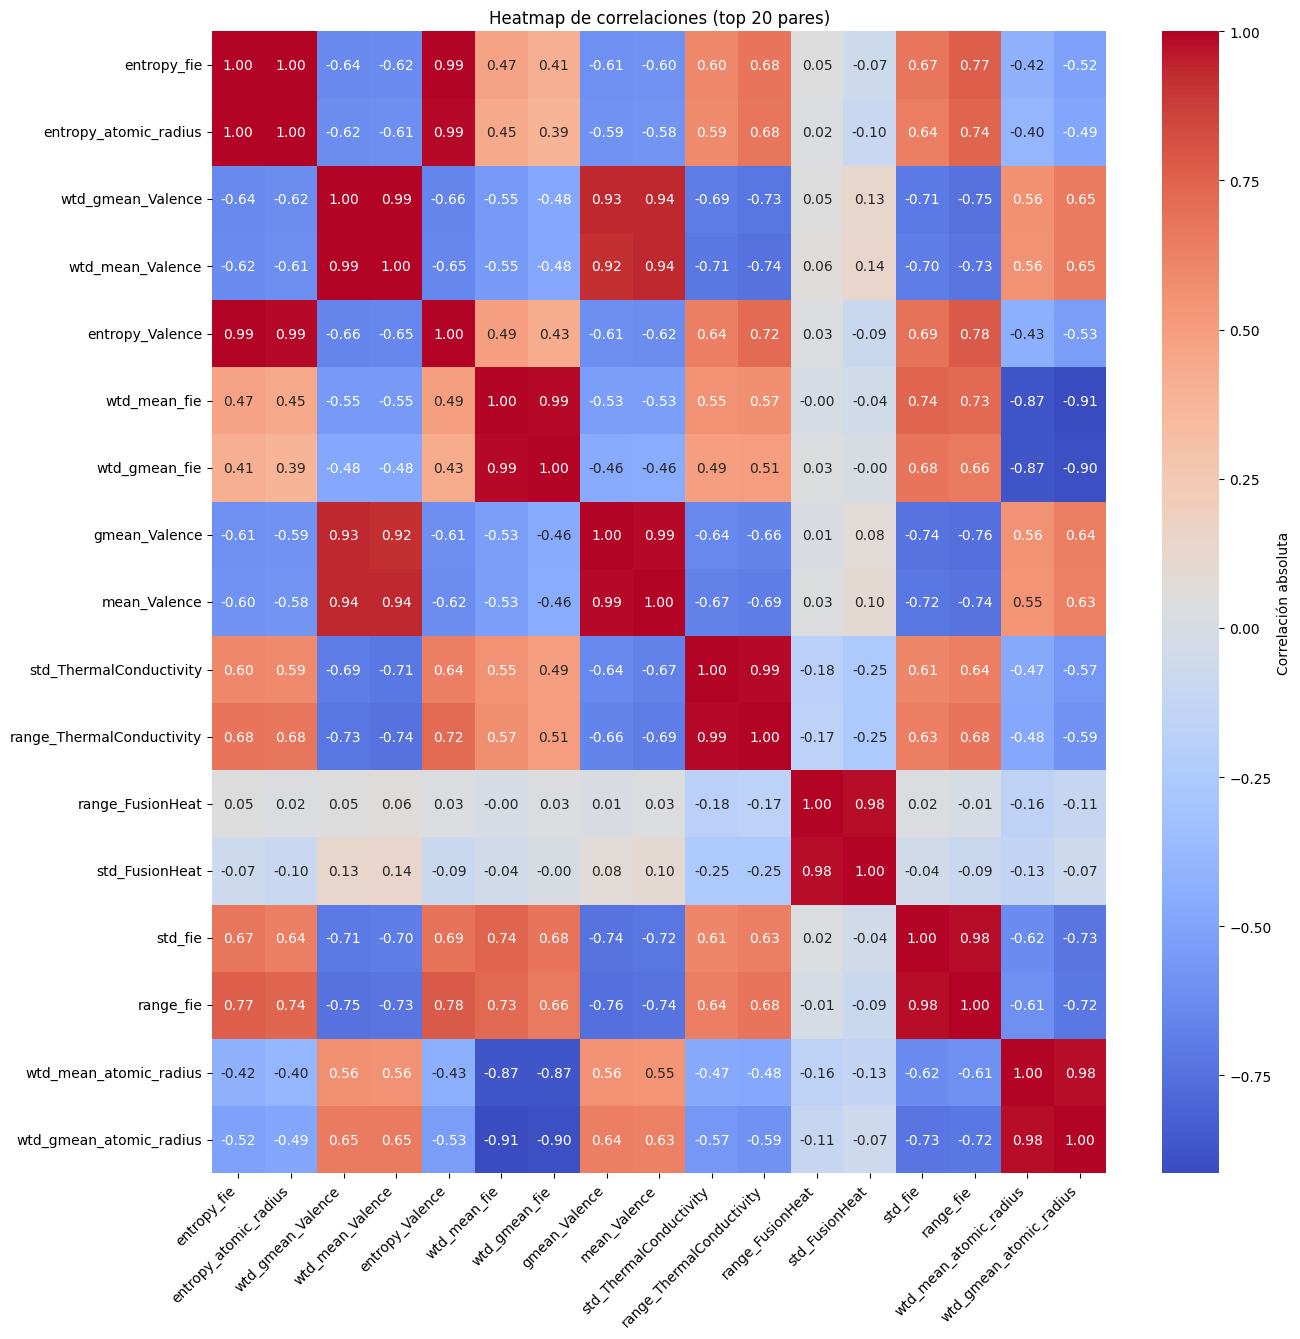

In [ ]:
# Hacemos una matriz de correlaciones absolutas de los pares de columnas más correlacionadas entre sí

# Cálculo de matriz de correlaciones absolutas
feat_cols = df.columns.drop('critical_temp')
corr = df[feat_cols].corr().abs()

# Poner a cero la diagonal (auto-correlación)
np.fill_diagonal(corr.values, 0)

# Obtener los top N pares de columnas más correlacionadas
N = 20
top_pairs = (corr.unstack().sort_values(ascending=False).head(N))

print(f"Top {N} pares de columnas más correlacionadas:")
print(top_pairs)

# Extraer la lista de las columnas implicadas en esos pares
top_cols = pd.unique(
    top_pairs.index.get_level_values(0).tolist() +
    top_pairs.index.get_level_values(1).tolist()
).tolist()
print("\nColumnas implicadas:")
print(top_cols)

# Submatriz de correlación para esas columnas
corr_sub = df[top_cols].corr()

# Plot de la submatriz de correlación
plt.figure(figsize=(len(top_cols)*0.5 + 5, len(top_cols)*0.5 + 5))
sns.heatmap(
    corr_sub,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Correlación absoluta'}
)
plt.title(f"Heatmap de correlaciones (top {N} pares)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Top 10 variables con más outliers:
 std_Density                     16.535359
wtd_entropy_ElectronAffinity    16.205123
gmean_atomic_mass               15.681464
range_Density                   13.652875
wtd_std_FusionHeat              12.402698
std_ElectronAffinity            11.973392
wtd_std_Density                 10.770392
mean_ElectronAffinity           10.685474
wtd_entropy_fie                 10.374110
range_FusionHeat                 9.907062
dtype: float64


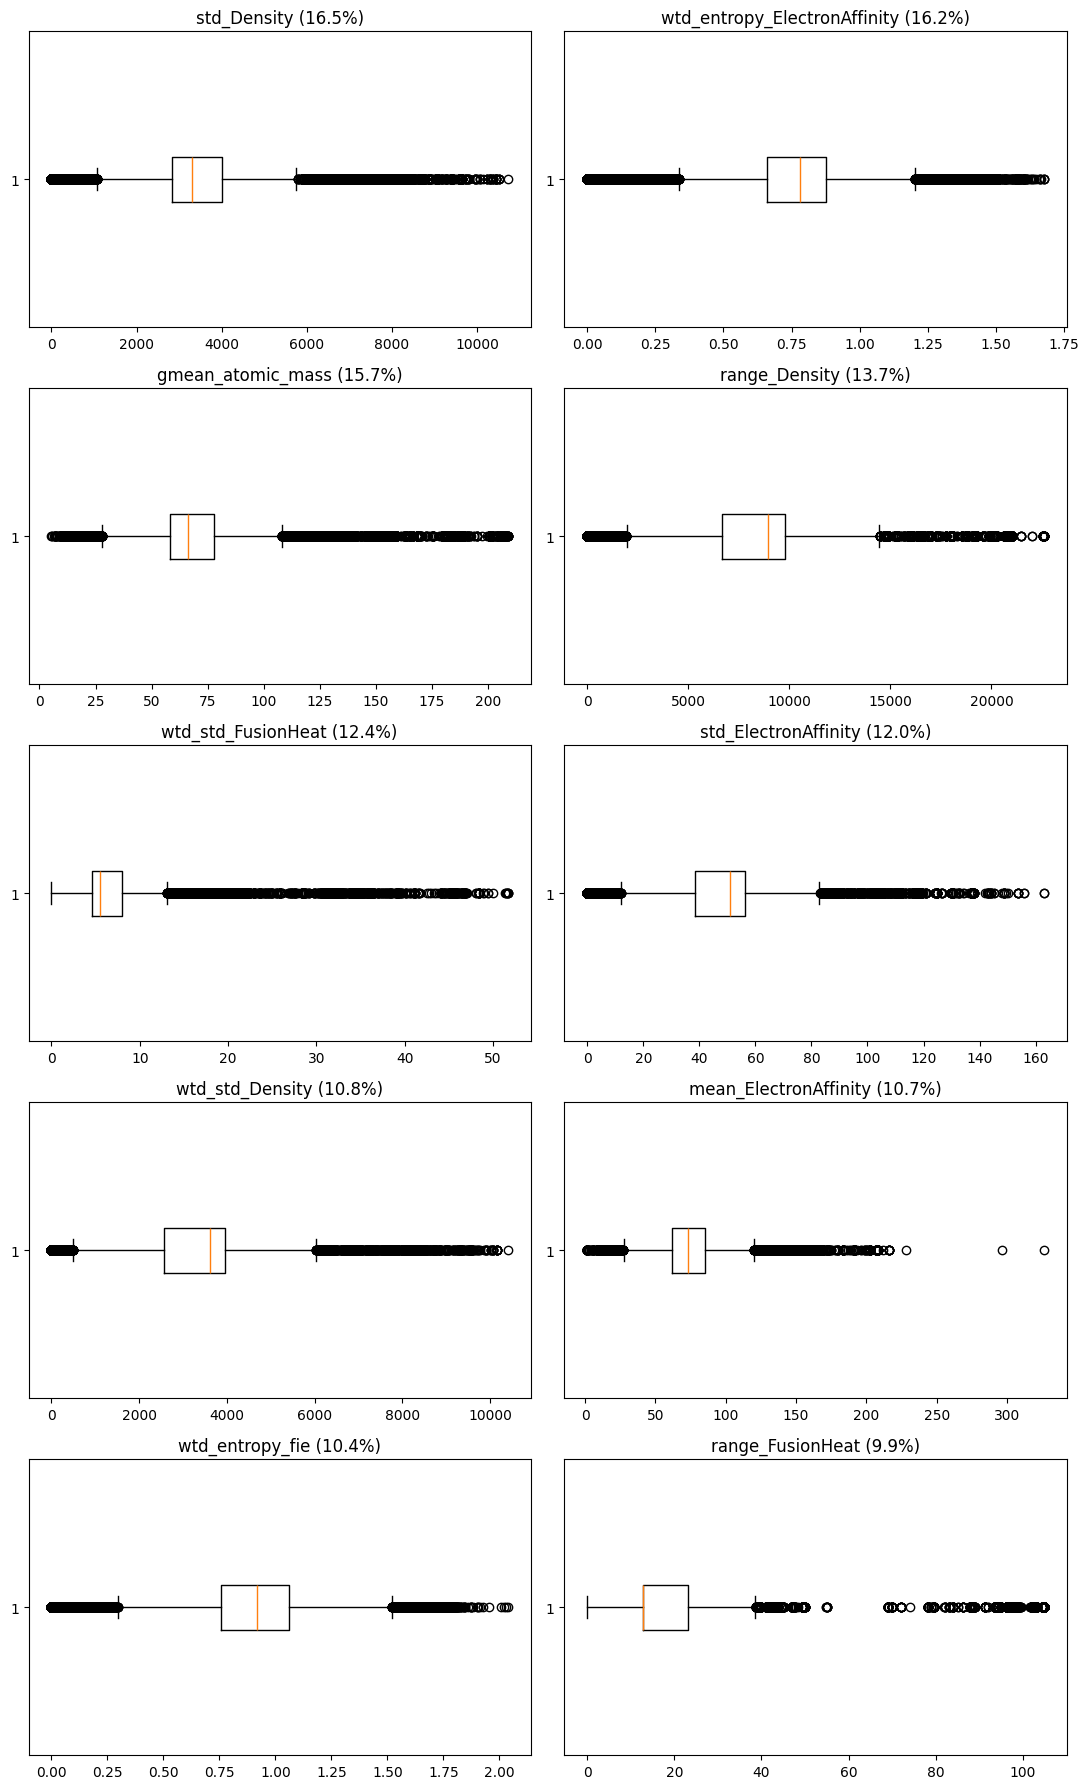

In [ ]:
# Analizamos los outliers de las columnas

# Remover variable objetivo para este análisis
feature_cols = df.columns.drop('critical_temp')

# Cálculo de outliers por columna
outlier_pct = {}
for col in feature_cols:
    Q1, Q3 = df[col].quantile([.25,.75])
    IQR = Q3 - Q1
    low, up = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    mask = (df[col] < low) | (df[col] > up)
    outlier_pct[col] = mask.mean() * 100

outlier_pct = pd.Series(outlier_pct).sort_values(ascending=False)
print("Top 10 variables con más outliers:\n", outlier_pct.head(10))

# Seleccionar las 10 columnas con más outliers
top10 = outlier_pct.head(10).index.tolist()

# Graficar diagramas de cajas para estas columnas
fig, axes = plt.subplots(5, 2, figsize=(11, 18))
for ax, col in zip(axes.flatten(), top10):
    ax.boxplot(df[col].dropna(), vert=False, showfliers=True)
    ax.set_title(f"{col} ({outlier_pct[col]:.1f}%)")
plt.tight_layout()
plt.show()

In [ ]:
# Preparamos la data de TRAIN y TEST para luego aplicar el pre procesamiento

# Separar X e y
X = df.drop(columns='critical_temp')
y = df['critical_temp']

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Identificamos las columnas con baja variabilidad y las eliminamos

# Inicializar y ajustar el selector de baja varianza
var_thresh = VarianceThreshold(threshold=0.1)
X_train_var = var_thresh.fit_transform(X_train)

# Obtener las columnas retenidas
selected_cols = X_train.columns[var_thresh.get_support()]

# 5. Reconstruir X_train y X_test como DataFrames
X_train = pd.DataFrame(X_train_var, columns=selected_cols, index=X_train.index)
X_test = X_test[selected_cols]

# Listado de features finales
print("Features retenidas:", list(selected_cols))

Features retenidas: ['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'range_

In [ ]:
#Eliminar las columnas que, entre ellas, tengan una correlación más del 95%

# Calcular matriz de correlación (valores absolutos) sobre X_train
corr_matrix = X_train.corr().abs()

# Definir umbral y detectar pares con alta correlación
THRESH = 0.95
to_drop = set()
cols = corr_matrix.columns
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if corr_matrix.iloc[i, j] >= THRESH:
            # descartamos la segunda columna del par
            to_drop.add(cols[j])

print("Columnas a eliminar por alta correlación:", to_drop)

# Eliminar esas columnas de X_train y X_test
X_train_reduced = X_train.drop(columns=to_drop)
X_test_reduced  = X_test.drop(columns=to_drop)

# Verificar shapes
print("Shape original X_train:", X_train.shape, "| reducido:", X_train_reduced.shape)
print("Shape original X_test :", X_test.shape, "| reducido:", X_test_reduced.shape)

Columnas a eliminar por alta correlación: {'wtd_entropy_atomic_radius', 'wtd_entropy_Valence', 'gmean_Valence', 'entropy_Valence', 'std_ElectronAffinity', 'gmean_fie', 'entropy_fie', 'std_Valence', 'std_ThermalConductivity', 'wtd_gmean_Valence', 'wtd_std_atomic_radius', 'std_Density', 'std_atomic_radius', 'wtd_gmean_fie', 'std_atomic_mass', 'std_fie', 'wtd_gmean_Density', 'entropy_atomic_radius', 'wtd_std_ThermalConductivity', 'wtd_gmean_FusionHeat', 'wtd_gmean_atomic_mass', 'wtd_gmean_atomic_radius', 'std_FusionHeat'}
Shape original X_train: (16957, 80) | reducido: (16957, 57)
Shape original X_test : (4240, 80) | reducido: (4240, 57)


In [ ]:
# Aplicamos el método de Winsorización

# Calculamos skew y bounds (IQR) en X_train
skewness = X_train.skew()
bounds = {}
for col in X_train.columns:
    q1, q3 = X_train[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    pct_low = (X_train[col] <  lb).mean()
    pct_high = (X_train[col] >  ub).mean()
    # Decidimos límites según la asimetría y la presencia de outliers
    if skewness[col] > 1 and pct_high > 0:
        limits = (0, pct_high)
    elif skewness[col] < -1 and pct_low > 0:
        limits = (pct_low, 0)
    elif pct_low > 0 or pct_high > 0:
        limits = (pct_low, pct_high)
    else:
        limits = (0, 0)
    bounds[col] = limits

# Aplicamos winsorización sobre X_train y X_test
for col, (low_lim, high_lim) in bounds.items():
    if low_lim or high_lim:
        X_train[col] = winsorize(X_train[col], limits=(low_lim, high_lim))
        X_test[col]  = winsorize(X_test[col],  limits=(low_lim, high_lim))


In [ ]:
# Hacemos escalamiento de los datos

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns, index=X_test.index)

# 2. Random Forest Regressor


Fitting estimator with 80 features.
Número óptimo de features: 70
Features seleccionadas: ['wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'range_ElectronAffi

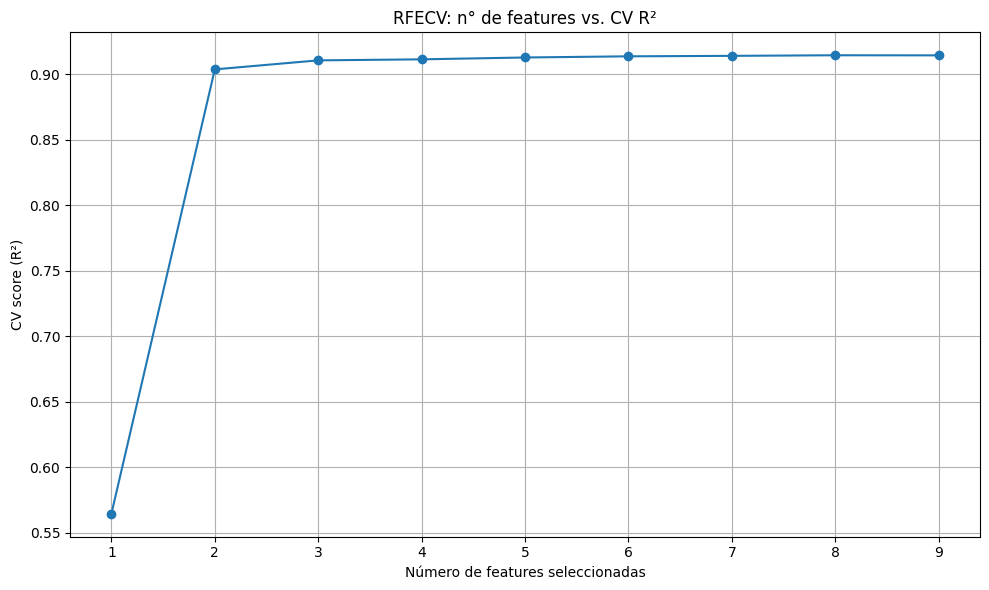

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Mejores parámetros: {'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 73}
RMSE en TEST:9.3013
R² en TRAIN:0.9764
R² en TEST:0.9265


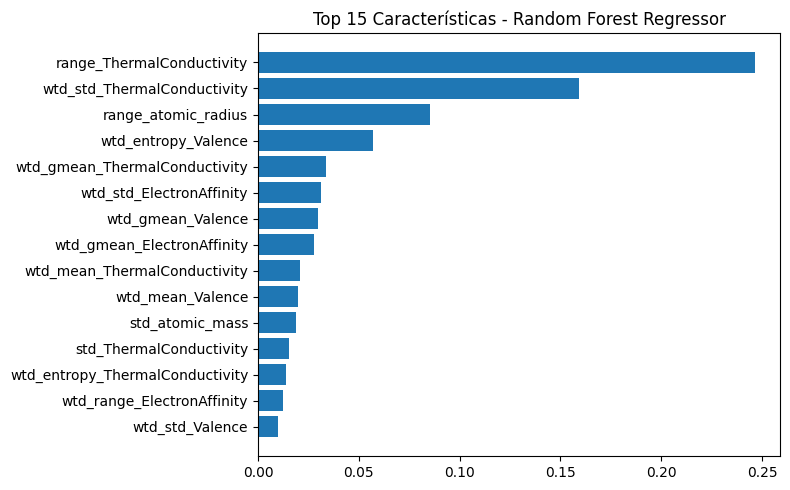

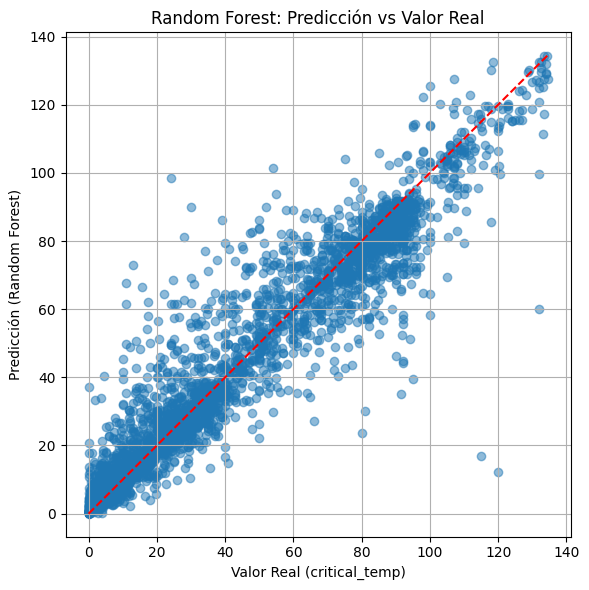

In [ ]:
# Selección de features con RFECV
rf_small = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rfecv = RFECV(
    estimator=rf_small,
    step=10,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
rfecv.fit(X_train_scaled, y_train)
selected_features = X_train_scaled.columns[rfecv.support_]

print("Número óptimo de features:", rfecv.n_features_)
selected_features = X_train_scaled.columns[rfecv.support_]
print("Features seleccionadas:", selected_features.tolist())

# Gráfico RFECV
scores = rfecv.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o')
plt.xlabel("Número de features seleccionadas")
plt.ylabel("CV score (R²)")
plt.title("RFECV: n° de features vs. CV R²")
plt.grid(True)
plt.tight_layout()
plt.show()

# Búsqueda aleatoria de hiperparámetros sobre features seleccionadas
param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 0.5, 0.8]
}
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

X_train_sel = X_train_scaled[selected_features]
X_test_sel  = X_test_scaled[selected_features]

rand_search.fit(X_train_sel, y_train)
best_rf = rand_search.best_estimator_
y_pred_train = best_rf.predict(X_train_sel)
y_pred_test = best_rf.predict(X_test_sel)

rmse_test_RF = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test_RF = r2_score(y_test, y_pred_test)

print("Mejores parámetros:", rand_search.best_params_)
print(f"RMSE en TEST:{rmse_test_RF:.4f}")
print(f"R² en TRAIN:{r2_train:.4f}")
print(f"R² en TEST:{r2_test_RF:.4f}")

# Top 15 características por importancia
importances = best_rf.feature_importances_
sorted_idx = importances.argsort()[::-1][:15]
plt.figure(figsize=(8, 5))
plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_train_sel.columns[sorted_idx])
plt.title("Top 15 Características - Random Forest Regressor")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Gráfico: Predicción vs Valor Real
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
min_val, max_val = y_test.min(), y_test.max()
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel('Valor Real (critical_temp)')
plt.ylabel('Predicción (Random Forest)')
plt.title('Random Forest: Predicción vs Valor Real')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. XG Boost


Fitting estimator with 80 features.
Fitting estimator with 70 features.
Fitting estimator with 60 features.
Número óptimo de features: 50
Features seleccionadas: ['wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'range_ElectronAffinity', 'wtd_range_ElectronAffinity', 'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat', 'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat', 'wtd_range_FusionHeat', 'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity', '

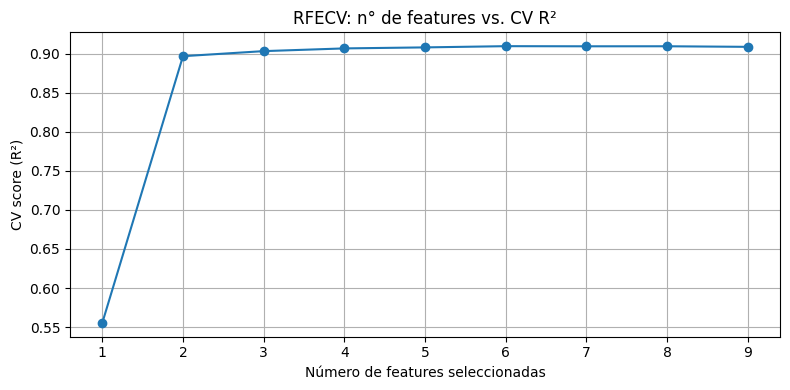

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores parámetros XGBoost: {'learning_rate': np.float64(0.11888733379488008), 'max_depth': 7, 'n_estimators': 199}
RMSE en TEST: 9.3080
R² en TEST: 0.9264
R² en TRAIN: 0.9744


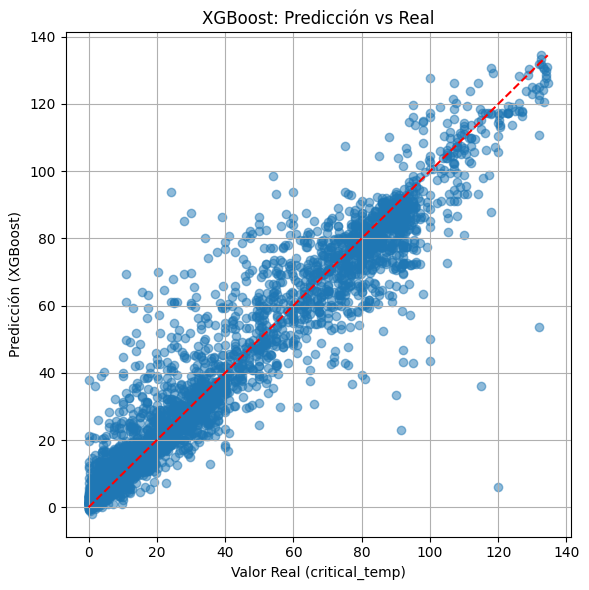

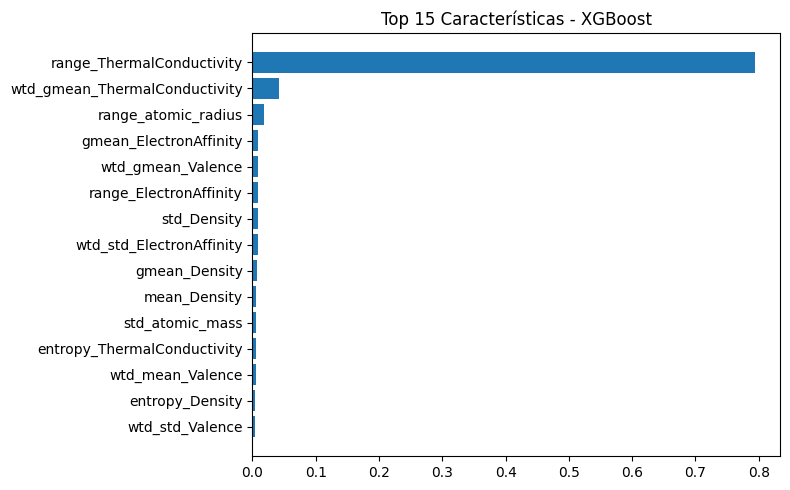

In [ ]:
# Selección de features con RFECV
xgb_small = xgb.XGBRegressor(
    n_estimators=50,
    random_state=42,
    objective='reg:squarederror'
)
rfecv = RFECV(
    estimator=xgb_small,
    step=10,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
rfecv.fit(X_train_scaled, y_train)

# Features seleccionadas y número óptimo
selected_feats = X_train_scaled.columns[rfecv.support_]
print("Número óptimo de features:", rfecv.n_features_)
print("Features seleccionadas:", selected_feats.tolist())

# Gráfico: RFECV (n° features vs CV R²)
scores = rfecv.cv_results_['mean_test_score']
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(scores) + 1), scores, marker='o')
plt.xlabel("Número de features seleccionadas")
plt.ylabel("CV score (R²)")
plt.title("RFECV: n° de features vs. CV R²")
plt.grid(True)
plt.tight_layout()
plt.show()

# RandomizedSearchCV sobre el subconjunto de features
xgb_model = xgb.XGBRegressor(
    random_state=42,
    objective='reg:squarederror'
)
param_dist = {
    'n_estimators':    randint(100, 300),
    'learning_rate':   uniform(0.05, 0.15),
    'max_depth':       randint(3, 8)
}
rand_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rand_search.fit(X_train_scaled[selected_feats], y_train)
best_xgb = rand_search.best_estimator_
print("Mejores parámetros XGBoost:", rand_search.best_params_)

# Predicción y métricas
y_pred_test = best_xgb.predict(X_test_scaled[selected_feats])
rmse_test_XG = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test_XG = r2_score(y_test, y_pred_test)
y_pred_train = best_xgb.predict(X_train_scaled[selected_feats])
r2_train = r2_score(y_train, y_pred_train)

print(f"RMSE en TEST: {rmse_test_XG:.4f}")
print(f"R² en TEST: {r2_test_XG:.4f}")
print(f"R² en TRAIN: {r2_train:.4f}")

# Predicción vs Valor Real
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
min_val, max_val = y_test.min(), y_test.max()
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel('Valor Real (critical_temp)')
plt.ylabel('Predicción (XGBoost)')
plt.title('XGBoost: Predicción vs Real')
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 15 características por importancia
importances = best_xgb.feature_importances_
sorted_idx  = importances.argsort()[::-1][:15]

plt.figure(figsize=(8, 5))
plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), selected_feats[sorted_idx])
plt.title("Top 15 Características - XGBoost")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# 3. Support Vector Regression (SVR)

Fitting estimator with 80 features.
Número óptimo de features: 70
Features seleccionadas: ['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'range_ElectronAffinity', 'std_Ele

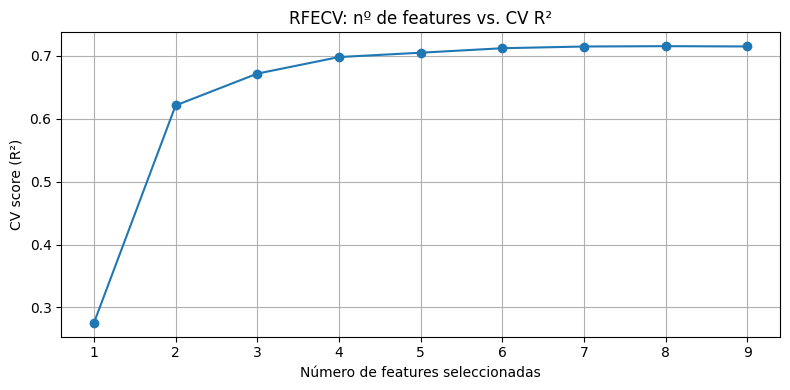

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores parámetros SVR: {'C': np.float64(38.07947176588889), 'epsilon': np.float64(0.4802857225639665), 'kernel': 'rbf'}

RMSE en TEST: 13.7864
R² en TRAIN: 0.8470
R² en TEST : 0.8385


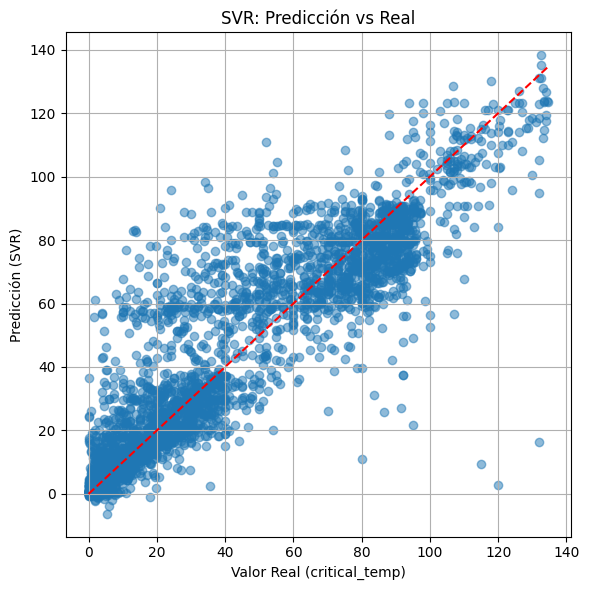

In [ ]:
# Selección de features con RFECV usando un SVR lineal
svr_small = SVR(kernel='linear')
rfecv = RFECV(
    estimator=svr_small,
    step=10,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
rfecv.fit(X_train_scaled, y_train)

selected_feats = X_train_scaled.columns[rfecv.support_]
print("Número óptimo de features:", rfecv.n_features_)
print("Features seleccionadas:", selected_feats.tolist())

# Gráfico RFECV: nº features vs CV R²
cv_scores = rfecv.cv_results_['mean_test_score']
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o')
plt.xlabel("Número de features seleccionadas")
plt.ylabel("CV score (R²)")
plt.title("RFECV: nº de features vs. CV R²")
plt.grid(True)
plt.tight_layout()
plt.show()


# RandomizedSearchCV sobre el subconjunto de features
svr = SVR()
param_dist = {
    'kernel': ['rbf', 'poly'],
    'C': uniform(1, 99),          # muestrea entre 1 y 100
    'epsilon': uniform(0.1, 0.4)  # muestrea entre 0.1 y 0.5
}

rand_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rand_search.fit(X_train_scaled[selected_feats], y_train)
best_svr = rand_search.best_estimator_
print("Mejores parámetros SVR:", rand_search.best_params_)

# 3) Cálculo de métricas
y_pred_train = best_svr.predict(X_train_scaled[selected_feats])
y_pred_test  = best_svr.predict(X_test_scaled[selected_feats])

rmse_test_SVR = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test_SVR = r2_score(y_test,  y_pred_test)

print(f"\nRMSE en TEST: {rmse_test_SVR:.4f}")
print(f"R² en TRAIN: {r2_train:.4f}")
print(f"R² en TEST : {r2_test_SVR:.4f}")

# Scatter Plot: Predicción vs Valor Real
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
min_val, max_val = y_test.min(), y_test.max()
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel('Valor Real (critical_temp)')
plt.ylabel('Predicción (SVR)')
plt.title('SVR: Predicción vs Real')
plt.grid(True)
plt.tight_layout()
plt.show()

# # Importancia de features (Permutation Importance)
# perm = permutation_importance(
#     best_svr,
#     X_test_scaled[selected_feats],
#     y_test,
#     n_repeats=10,
#     random_state=42,
#     n_jobs=-1
# )
# importances = perm.importances_mean
# sorted_idx = np.argsort(importances)[::-1][:15]

# plt.figure(figsize=(8, 5))
# plt.barh(range(len(sorted_idx)), importances[sorted_idx])
# plt.yticks(range(len(sorted_idx)), selected_feats[sorted_idx])
# plt.title("Top 15 Características - SVR (Permutation Importance)")
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()


# 4. Stacking Ensemble de Random Forest Regressor, XG Boost Regressor y Support Vector Regression

R² en TRAIN (Stacking): 0.9765
RMSE en TEST (Stacking): 9.2099
R² en TEST (Stacking): 0.9279


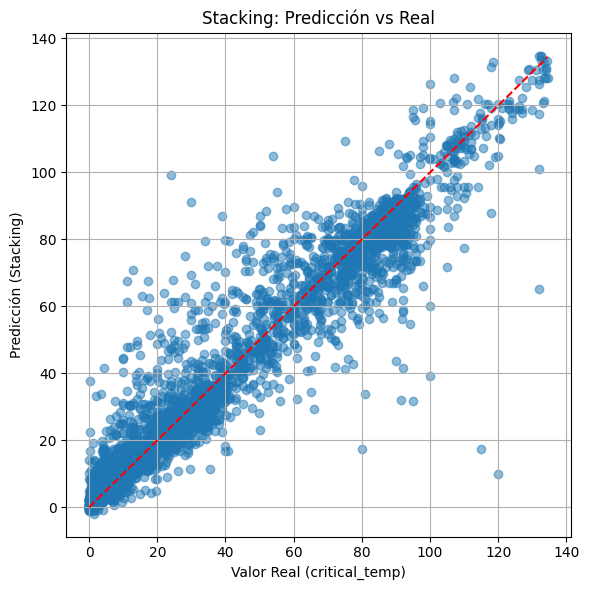

In [ ]:
# Definir el ensemble usando los modelos ya tuneados
estimators = [
    ('xgb', best_xgb),
    ('svr', best_svr),
    ('rf',  best_rf)
]

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV(),
    cv=3,
    passthrough=True,
    n_jobs=-1
)

# Entrenar el stacking
stacking_model.fit(X_train_scaled, y_train.values.ravel())

# Predecir en train y test
y_pred_train = stacking_model.predict(X_train_scaled)
y_pred_test = stacking_model.predict(X_test_scaled)

# Métricas: RMSE y R²
rmse_test_ST = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test_ST = r2_score(y_test,  y_pred_test)

print(f"R² en TRAIN (Stacking): {r2_train:.4f}")
print(f"RMSE en TEST (Stacking): {rmse_test_ST:.4f}")
print(f"R² en TEST (Stacking): {r2_test_ST:.4f}")

# Gráfico: Predicción vs Valor Real
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
min_val, max_val = y_test.min(), y_test.max()
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel('Valor Real (critical_temp)')
plt.ylabel('Predicción (Stacking)')
plt.title('Stacking: Predicción vs Real')
plt.grid(True)
plt.tight_layout()
plt.show()


# 5. Multiple Linear Regression

Número óptimo de features: 80
Features seleccionadas     : ['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinit

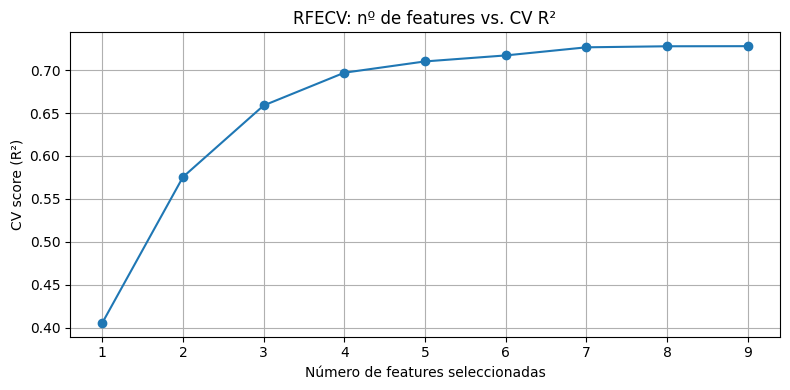

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejor alpha de Ridge: 0.5908361216819946

RMSE en TEST: 18.9266
R² en TRAIN: 0.7304
R² en TEST : 0.6957


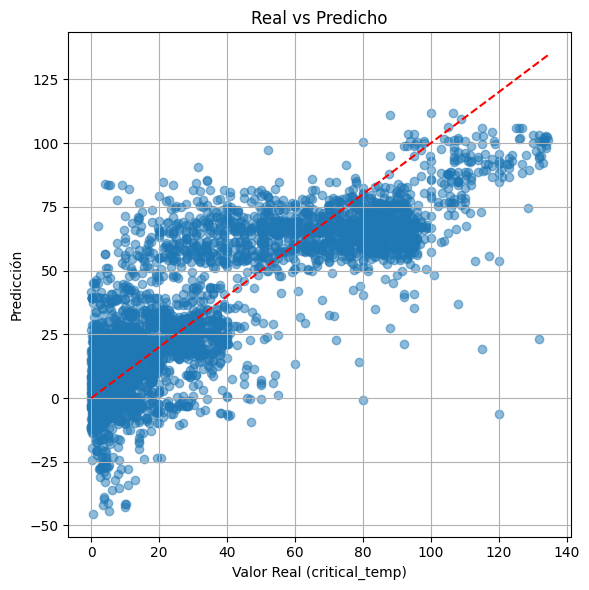


Coeficientes ordenados por magnitud:


,feature,coef
74,entropy_Valence,28.498906
22,wtd_mean_atomic_radius,27.531565
46,range_ElectronAffinity,-23.613585
24,wtd_gmean_atomic_radius,-23.391987
29,std_atomic_radius,-22.902541
...,...,...
38,wtd_range_Density,-0.482669
43,gmean_ElectronAffinity,0.403630
58,std_FusionHeat,0.314210
77,wtd_range_Valence,0.259573


In [ ]:
# Selección de features con RFECV
rfecv = RFECV(
    estimator=LinearRegression(),
    step=10,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
rfecv.fit(X_train_scaled, y_train)

selected_features = X_train_scaled.columns[rfecv.support_]
print("Número óptimo de features:", rfecv.n_features_)
print("Features seleccionadas     :", selected_features.tolist())

# Gráfico RFECV: nº de features vs CV R²
cv_scores = rfecv.cv_results_['mean_test_score']
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o')
plt.xlabel("Número de features seleccionadas")
plt.ylabel("CV score (R²)")
plt.title("RFECV: nº de features vs. CV R²")
plt.grid(True)
plt.tight_layout()
plt.show()

# RandomizedSearchCV sobre features seleccionadas
param_dist = {
    'alpha': uniform(0.01, 10.0)   # alpha en [0.01, 10.01)
}
ridge = Ridge(random_state=42)

rand_search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rand_search.fit(X_train_scaled[selected_features], y_train)

best_model = rand_search.best_estimator_
print("Mejor alpha de Ridge:", rand_search.best_params_['alpha'])

# Cálculo de métricas de desempeño
y_pred_train = best_model.predict(X_train_scaled[selected_features])
y_pred_test = best_model.predict(X_test_scaled[selected_features])

rmse_test_LN = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test_LN = r2_score(y_test,  y_pred_test)

print(f"\nRMSE en TEST: {rmse_test_LN:.4f}")
print(f"R² en TRAIN: {r2_train:.4f}")
print(f"R² en TEST : {r2_test_LN:.4f}")

# Gráfico: Real vs Predicho
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
min_val, max_val = y_test.min(), y_test.max()
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel("Valor Real (critical_temp)")
plt.ylabel("Predicción")
plt.title("Real vs Predicho")
plt.grid(True)
plt.tight_layout()
plt.show()

# Tabla de coeficientes ordenados por magnitud
coef_df = pd.DataFrame({
    'feature': selected_features,
    'coef': best_model.coef_
})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df_sorted = coef_df.sort_values('abs_coef', ascending=False).drop(columns='abs_coef')

# Mostrar todos los coeficientes
print("\nCoeficientes ordenados por magnitud:")
display(coef_df_sorted)


Comparación de Modelos


,Modelo,RMSE,R²
0,Multiple Linear Regressor,18.926577,0.695692
1,Random Forest Regressor,9.301284,0.926505
2,XGBoost Regressor,9.307956,0.926400
3,Support Vector Regressor,13.786421,0.838537
4,Stacking Regressor,9.209889,0.927943


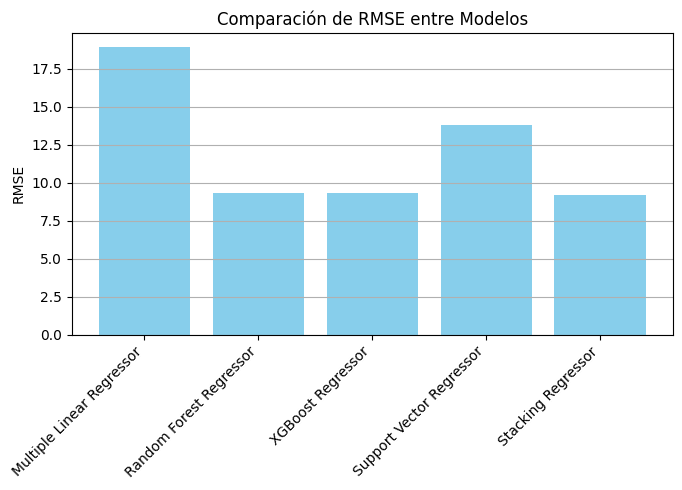

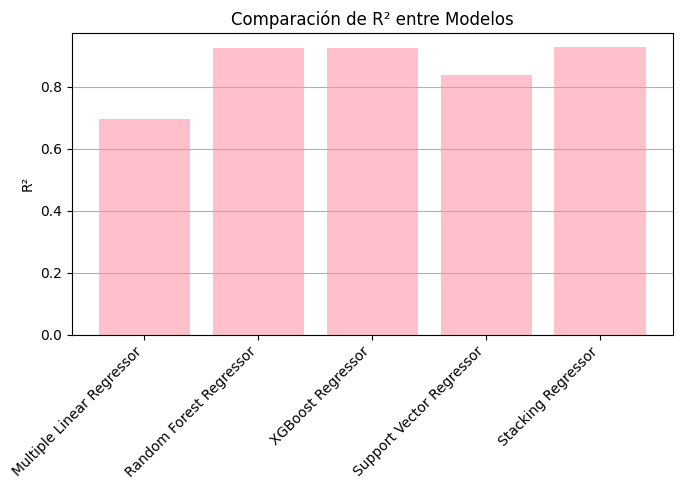

In [ ]:
# Crear el DataFrame de comparación
resultados = pd.DataFrame({
    'Modelo': [
        'Multiple Linear Regressor',
        'Random Forest Regressor',
        'XGBoost Regressor',
        'Support Vector Regressor',
        'Stacking Regressor'
    ],
    'RMSE': [
        rmse_test_LN,
        rmse_test_RF,
        rmse_test_XG,
        rmse_test_SVR,
        rmse_test_ST
    ],
    'R²': [
        r2_test_LN,
        r2_test_RF,
        r2_test_XG,
        r2_test_SVR,
        r2_test_ST
    ]
})

print("\nComparación de Modelos")
display(resultados)

# Gráfico de RMSE
plt.figure(figsize=(7, 5))
plt.bar(resultados['Modelo'], resultados['RMSE'], color='skyblue')
plt.title("Comparación de RMSE entre Modelos")
plt.ylabel("RMSE")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Gráfico de R²
plt.figure(figsize=(7, 5))
plt.bar(resultados['Modelo'], resultados['R²'], color='pink')
plt.title("Comparación de R² entre Modelos")
plt.ylabel("R²")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

